In [1]:
import numpy as np 
import pandas as pd

/kaggle/input/fuel-data/MOPS hist.csv
/kaggle/input/inflation-rate-philippines/Inflation Rate.csv


In [2]:
df = pd.read_csv('/kaggle/input/fuel-data/MOPS hist.csv')

df.head()


,Month,Year,MOPS
0,1,2002,17.482999
1,2,2002,18.539833
2,3,2002,21.078740
3,4,2002,23.339299
4,5,2002,24.595988


In [3]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

import xgboost as xgb
from sklearn.metrics import mean_squared_error



df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Month,Year,MOPS
0,1,2002,17.482999
1,2,2002,18.539833
2,3,2002,21.078740
3,4,2002,23.339299
4,5,2002,24.595988


<Axes: xlabel='Date'>

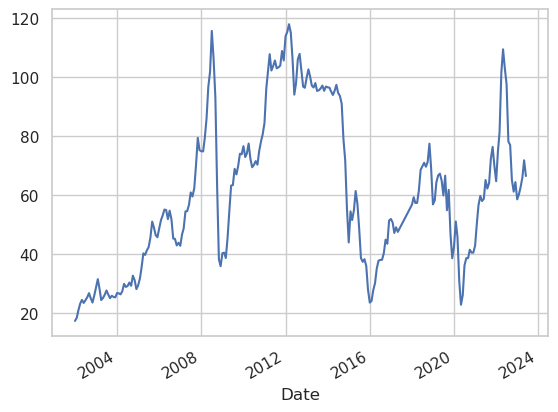

In [4]:
df['Date'] = df['Month'].apply(lambda x: calendar.month_name[x]) + ' ' + df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

df1 = df.set_index('Date')

df1['MOPS'].plot()

## Feature Creation


In [5]:
def create_features(df):
    
    df =df.copy() # to make sure that the source data won't be overwritten
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    
    return df

df2 = create_features(df1)



## Visualize Target Feature

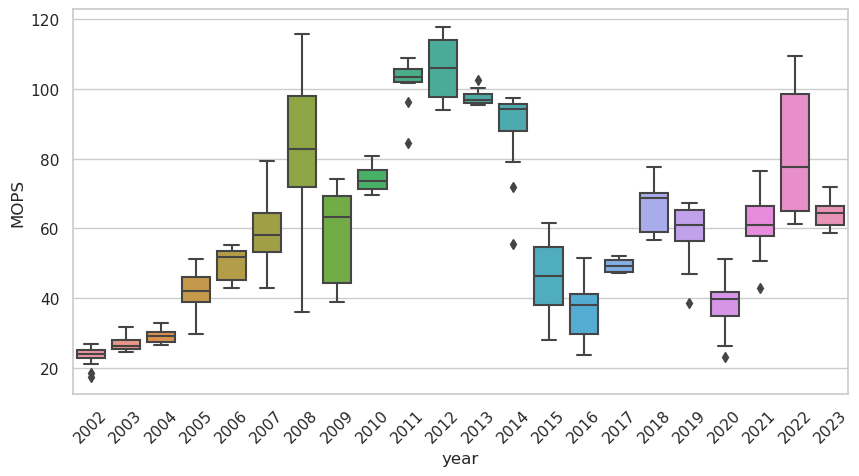

In [6]:
plt.figure(figsize=(10, 5))

sns.boxplot(data = df2, x = 'year', y = 'MOPS')

plt.xticks(rotation=45)

plt.show()

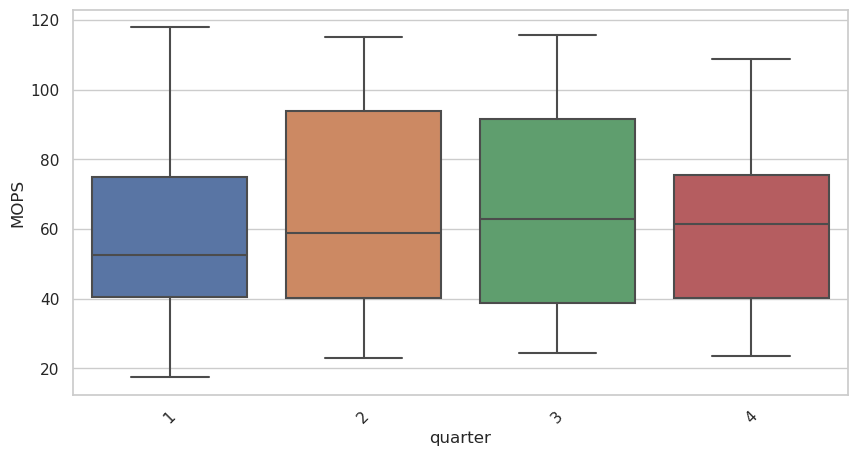

In [7]:
plt.figure(figsize=(10, 5))

sns.boxplot(data = df2, x = 'quarter', y = 'MOPS')

plt.xticks(rotation=45)

plt.show()

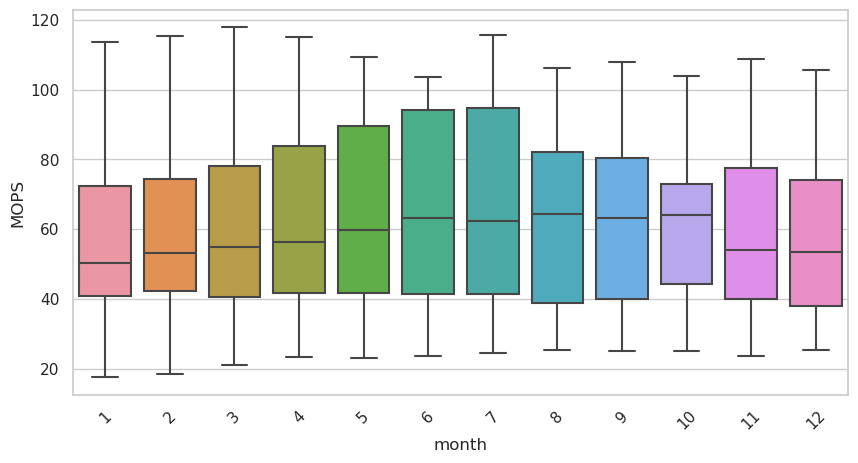

In [8]:
plt.figure(figsize=(10, 5))

sns.boxplot(data = df2, x = 'month', y = 'MOPS')

plt.xticks(rotation=45)

plt.show()

<Axes: xlabel='Date'>

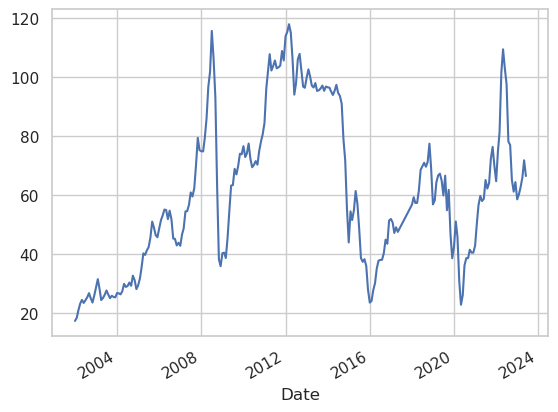

In [9]:
df2['MOPS'].plot()

## Creating Time Series Lag Features


In [10]:
for i in range(1,5):
    df2[f'MOPS_{i}']= df2['MOPS'].shift(i)
df2.head()
# df2['MOPS_1']= df2['MOPS'].shift(1)



,Month,Year,MOPS,quarter,month,year,MOPS_1,MOPS_2,MOPS_3,MOPS_4
Date,,,,,,,,,,
2002-01-01,1,2002,17.482999,1,1,2002,NaN,NaN,NaN,NaN
2002-02-01,2,2002,18.539833,1,2,2002,17.482999,NaN,NaN,NaN
2002-03-01,3,2002,21.078740,1,3,2002,18.539833,17.482999,NaN,NaN
2002-04-01,4,2002,23.339299,2,4,2002,21.078740,18.539833,17.482999,NaN
2002-05-01,5,2002,24.595988,2,5,2002,23.339299,21.078740,18.539833,17.482999


Checking correlation from Lagged Features


In [11]:
df2.corr()

,Month,Year,MOPS,quarter,month,year,MOPS_1,MOPS_2,MOPS_3,MOPS_4
Month,1.000000,-0.051899,0.026062,0.971747,1.000000,-0.051899,0.066288,0.082958,0.078421,0.063855
Year,-0.051899,1.000000,0.291645,-0.052507,-0.051899,1.000000,0.289717,0.287560,0.287836,0.289515
MOPS,0.026062,0.291645,1.000000,0.026894,0.026062,0.291645,0.975422,0.932720,0.885289,0.843261
quarter,0.971747,-0.052507,0.026894,1.000000,0.971747,-0.052507,0.065208,0.085744,0.080746,0.063410
month,1.000000,-0.051899,0.026062,0.971747,1.000000,-0.051899,0.066288,0.082958,0.078421,0.063855
year,-0.051899,1.000000,0.291645,-0.052507,-0.051899,1.000000,0.289717,0.287560,0.287836,0.289515
MOPS_1,0.066288,0.289717,0.975422,0.065208,0.066288,0.289717,1.000000,0.975500,0.932710,0.885311
MOPS_2,0.082958,0.287560,0.932720,0.085744,0.082958,0.287560,0.975500,1.000000,0.975583,0.932914
MOPS_3,0.078421,0.287836,0.885289,0.080746,0.078421,0.287836,0.932710,0.975583,1.000000,0.975610
MOPS_4,0.063855,0.289515,0.843261,0.063410,0.063855,0.289515,0.885311,0.932914,0.975610,1.000000


In [12]:
#ONLY CHOOSING MOPS_1 AS VALID TIME SERIES FEATURES

df2.columns

df2 = df2[[ 'MOPS', 'quarter', 'month', 'year', 'MOPS_1']]

In [13]:
df2.head()

,MOPS,quarter,month,year,MOPS_1
Date,,,,,
2002-01-01,17.482999,1,1,2002,NaN
2002-02-01,18.539833,1,2,2002,17.482999
2002-03-01,21.078740,1,3,2002,18.539833
2002-04-01,23.339299,2,4,2002,21.078740
2002-05-01,24.595988,2,5,2002,23.339299


<Axes: xlabel='Date'>

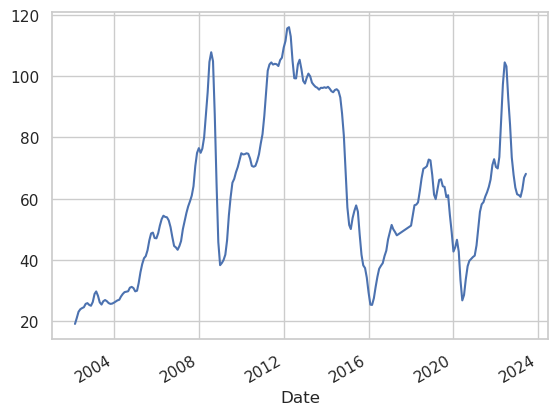

In [14]:
df2['rolling_mean'] = df2['MOPS'].rolling(window=3).mean()

df2['rolling_std'] = df2['MOPS'].rolling(window=3).std()


df2['rolling_mean'].plot()

,MOPS,quarter,month,year,MOPS_1,rolling_mean,rolling_std
Date,,,,,,,
2023-02-01,60.3728,1,2,2023,58.6015,61.138200,2.993706
2023-03-01,62.7377,1,3,2023,60.3728,60.570667,2.075187
2023-04-01,66.0137,2,4,2023,62.7377,63.041400,2.832687
2023-05-01,71.8155,2,5,2023,66.0137,66.855633,4.597092
2023-06-01,66.5044,2,6,2023,71.8155,68.111200,3.217386


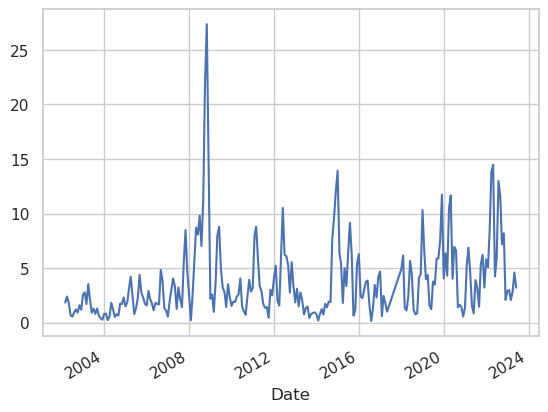

In [15]:
df2['rolling_std'].plot()

df2.tail()

<Axes: xlabel='month'>

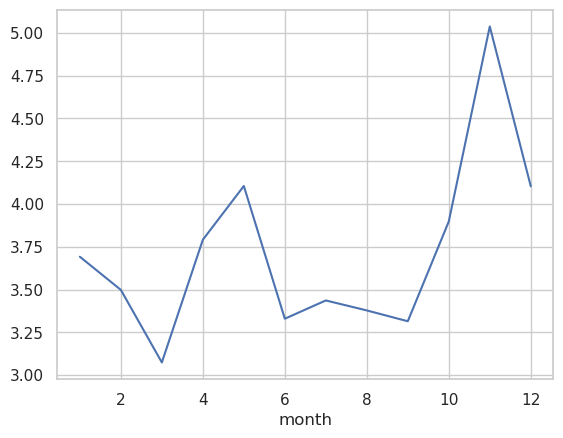

In [16]:
df2.groupby('month')['rolling_std'].mean().plot()

<Axes: xlabel='Date'>

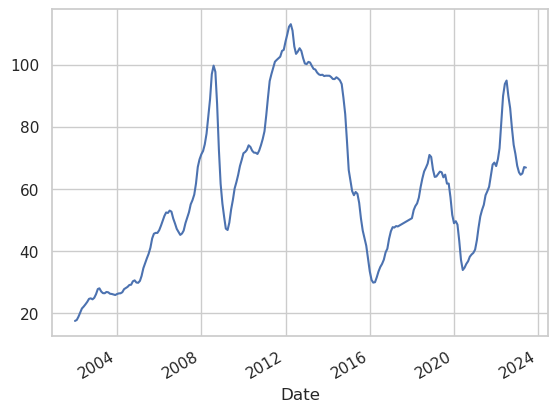

In [17]:
# Define the smoothing factor (alpha) for EMA
alpha = .3  # Customize the smoothing factor as needed

# Calculate the Exponential Moving Average
df2['EMA'] = df2['MOPS'].ewm(alpha=alpha, adjust=False).mean()

df2['EMA'].plot()

In [18]:
df2

,MOPS,quarter,month,year,MOPS_1,rolling_mean,rolling_std,EMA
Date,,,,,,,,
2002-01-01,17.482999,1,1,2002,NaN,NaN,NaN,17.482999
2002-02-01,18.539833,1,2,2002,17.482999,NaN,NaN,17.800049
2002-03-01,21.078740,1,3,2002,18.539833,19.033858,1.848076,18.783657
2002-04-01,23.339299,2,4,2002,21.078740,20.985957,2.401077,20.150349
2002-05-01,24.595988,2,5,2002,23.339299,23.004676,1.782340,21.484041
...,...,...,...,...,...,...,...,...
2023-02-01,60.372800,1,2,2023,58.601500,61.138200,2.993706,65.342129
2023-03-01,62.737700,1,3,2023,60.372800,60.570667,2.075187,64.560800
2023-04-01,66.013700,2,4,2023,62.737700,63.041400,2.832687,64.996670


In [19]:
a=df2.groupby('month')['MOPS'].mean()
# df2.groupby('month')['MOPS'].mean().plot()

a = pd.DataFrame(a)

a = a.reset_index()

a = a.rename(columns = {'MOPS':'MOPS_cat_ave'})

a


,month,MOPS_cat_ave
0,1,55.596752
1,2,58.639634
2,3,59.803359
3,4,62.038532
4,5,63.103744
5,6,63.778376
6,7,64.888513
7,8,63.889157
8,9,62.557734
9,10,61.718475


,month,rolling_std_cat_ave
0,1,3.691598
1,2,3.497896
2,3,3.073671
3,4,3.791022
4,5,4.105425
5,6,3.329308
6,7,3.436173
7,8,3.377797
8,9,3.314553
9,10,3.897907


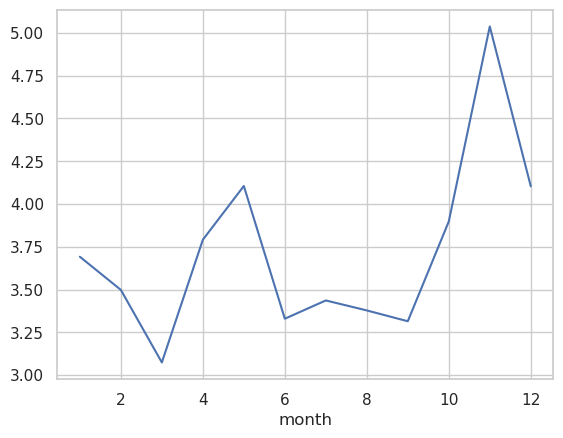

In [20]:
b = df2.groupby('month')['rolling_std'].mean()
df2.groupby('month')['rolling_std'].mean().plot()

b = pd.DataFrame(b)

b = b.reset_index()

b = b.rename(columns = {'rolling_std':'rolling_std_cat_ave'})

b

In [21]:
df2.shape

(251, 8)

In [22]:
df3 = df2.merge(a,on = 'month', how = 'left')

df3.head()

df4 = df3.merge(b,on = 'month', how = 'left')

df4.head()

,MOPS,quarter,month,year,MOPS_1,rolling_mean,rolling_std,EMA,MOPS_cat_ave,rolling_std_cat_ave
0,17.482999,1,1,2002,NaN,NaN,NaN,17.482999,55.596752,3.691598
1,18.539833,1,2,2002,17.482999,NaN,NaN,17.800049,58.639634,3.497896
2,21.078740,1,3,2002,18.539833,19.033858,1.848076,18.783657,59.803359,3.073671
3,23.339299,2,4,2002,21.078740,20.985957,2.401077,20.150349,62.038532,3.791022
4,24.595988,2,5,2002,23.339299,23.004676,1.782340,21.484041,63.103744,4.105425


## IS THERE A DATA THAT COULD EXPLAIN THE ROLLING_STANDARD DEVIATION??
- Checking Rolling_STD of Inflation Rate,Foreign Exchange,
- Checking for Typhoon and Weather Forecast

In [23]:
inf_rate = pd.read_csv('/kaggle/input/inflation-rate-philippines/Inflation Rate.csv')

In [24]:
inf_rate.rename(columns = {'Year':'year','Philippines':'inflation_rate'},inplace = True)

inf_rate

df5 = df4.merge(inf_rate, on = 'year', how = 'left')

df5

,MOPS,quarter,month,year,MOPS_1,rolling_mean,rolling_std,EMA,MOPS_cat_ave,rolling_std_cat_ave,inflation_rate
0,17.482999,1,1,2002,NaN,NaN,NaN,17.482999,55.596752,3.691598,2.72
1,18.539833,1,2,2002,17.482999,NaN,NaN,17.800049,58.639634,3.497896,2.72
2,21.078740,1,3,2002,18.539833,19.033858,1.848076,18.783657,59.803359,3.073671,2.72
3,23.339299,2,4,2002,21.078740,20.985957,2.401077,20.150349,62.038532,3.791022,2.72
4,24.595988,2,5,2002,23.339299,23.004676,1.782340,21.484041,63.103744,4.105425,2.72
...,...,...,...,...,...,...,...,...,...,...,...
246,60.372800,1,2,2023,58.601500,61.138200,2.993706,65.342129,58.639634,3.497896,NaN
247,62.737700,1,3,2023,60.372800,60.570667,2.075187,64.560800,59.803359,3.073671,NaN
248,66.013700,2,4,2023,62.737700,63.041400,2.832687,64.996670,62.038532,3.791022,NaN
249,71.815500,2,5,2023,66.013700,66.855633,4.597092,67.042319,63.103744,4.105425,NaN


## ADD CONSUMER PRICE INDEX TO FEATURES


## MAKE A TRAIN/TEST SET

In [25]:
df5

,MOPS,quarter,month,year,MOPS_1,rolling_mean,rolling_std,EMA,MOPS_cat_ave,rolling_std_cat_ave,inflation_rate
0,17.482999,1,1,2002,NaN,NaN,NaN,17.482999,55.596752,3.691598,2.72
1,18.539833,1,2,2002,17.482999,NaN,NaN,17.800049,58.639634,3.497896,2.72
2,21.078740,1,3,2002,18.539833,19.033858,1.848076,18.783657,59.803359,3.073671,2.72
3,23.339299,2,4,2002,21.078740,20.985957,2.401077,20.150349,62.038532,3.791022,2.72
4,24.595988,2,5,2002,23.339299,23.004676,1.782340,21.484041,63.103744,4.105425,2.72
...,...,...,...,...,...,...,...,...,...,...,...
246,60.372800,1,2,2023,58.601500,61.138200,2.993706,65.342129,58.639634,3.497896,NaN
247,62.737700,1,3,2023,60.372800,60.570667,2.075187,64.560800,59.803359,3.073671,NaN
248,66.013700,2,4,2023,62.737700,63.041400,2.832687,64.996670,62.038532,3.791022,NaN
249,71.815500,2,5,2023,66.013700,66.855633,4.597092,67.042319,63.103744,4.105425,NaN


In [26]:
df5['Date'] = df5['month'].apply(lambda x: calendar.month_name[x]) + ' ' + df5['year'].astype(str)
df5['Date'] = pd.to_datetime(df5['Date'])
df5 = df5.set_index('Date')

df8 = df5.reset_index('Date')

df5['Date'] = df8['Date']

In [27]:
df5.columns

Index(['MOPS', 'quarter', 'month', 'year', 'MOPS_1', 'rolling_mean',
       'rolling_std', 'EMA', 'MOPS_cat_ave', 'rolling_std_cat_ave',
       'inflation_rate', 'Date'],
      dtype='object')

In [28]:
train = df5[((df5.index > '2002-1-1')&(df5.index < '2018-1-1'))]
test = df5[(df5.index >= '2018-1-1')]

# FEATURES = [ 'quarter', 'month', 'year', 'MOPS_1',
#        'rolling_std', 'EMA', 'MOPS_cat_ave', 'rolling_std_cat_ave',
#        'inflation_rate']

FEATURES = ['rolling_std',  'MOPS_cat_ave', 'rolling_std_cat_ave',
       'inflation_rate']


TARGET = ['MOPS']

In [29]:
X_test = test[FEATURES]
y_test = test[TARGET]

X_train = train[FEATURES]
y_train = train[TARGET]

In [30]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping = 50)

reg.fit(X_train, y_train, eval_set = [(X_train,y_train),(X_test,y_test)], verbose =True)

[08:06:32] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[0]	validation_0-rmse:48.69087	validation_1-rmse:50.52529
[1]	validation_0-rmse:35.53395	validation_1-rmse:43.00337
[2]	validation_0-rmse:26.17342	validation_1-rmse:37.56822
[3]	validation_0-rmse:19.52421	validation_1-rmse:33.70141
[4]	validation_0-rmse:14.67779	validation_1-rmse:31.24200
[5]	validation_0-rmse:11.40298	validation_1-rmse:29.48688
[6]	validation_0-rmse:9.04962	validation_1-rmse:28.04688
[7]	validation_0-rmse:7.31785	validation_1-rmse:26.70007
[8]	validation_0-rmse:6.22818	validation_1-rmse:25.87633
[9]	validation_0-rmse:5.23563	validation_1-rmse:25.28495
[10]	validation_0-rmse:4.52485	validation_1-rmse:24.76826
[11]	validation_0-rmse:4.03496	validation_1-rmse:24.36307
[12]	validation_0-rmse:3.71846	validation_1-rmse:24.08990
[13]	validation_0-rmse:3.28290	validation_1-rmse:23.89578
[14]	validation_0-rmse:2.93591	validation_1-rmse:23.83009
[15]	validation_0-rmse:2.68856	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

## CHECKING FEATURE IMPORTANCES

In [31]:
#CHECKING FEATURE IMPORTANCES
fi = pd.DataFrame(reg.feature_importances_, 
                   index = reg.feature_names_in_,
                   columns = ['importance'])

fi.head()

,importance
rolling_std,0.017403
MOPS_cat_ave,0.022481
rolling_std_cat_ave,0.018174
inflation_rate,0.941942


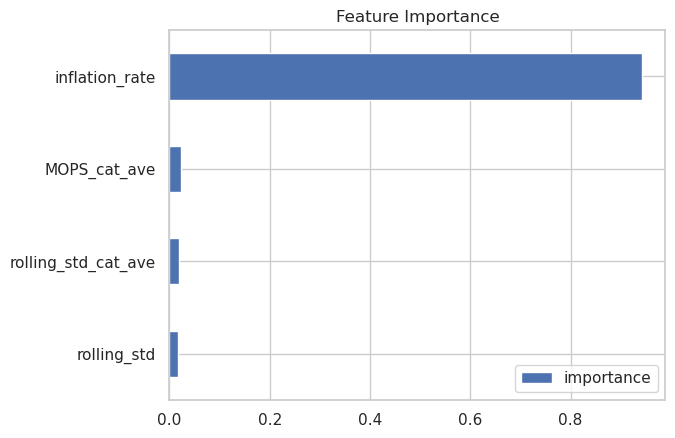

In [32]:
fi.sort_values('importance').plot(kind = 'barh', title = 'Feature Importance')
plt.show()

In [33]:
test['predictions'] = reg.predict(X_test)

test['predictions']

/tmp/ipykernel_20/1735013878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = reg.predict(X_test)


Date
2018-01-01    48.599728
2018-02-01    50.774868
2018-03-01    47.148220
2018-04-01    49.334805
2018-05-01    51.240273
                ...    
2023-02-01    49.806187
2023-03-01    49.826401
2023-04-01    51.150070
2023-05-01    61.378788
2023-06-01    58.158737
Name: predictions, Length: 66, dtype: float32

In [34]:
df6 = df5.merge(test[['predictions']], how = 'left',left_index = True, right_index = True)

# df7 = df6.reset_index()

# df7                    

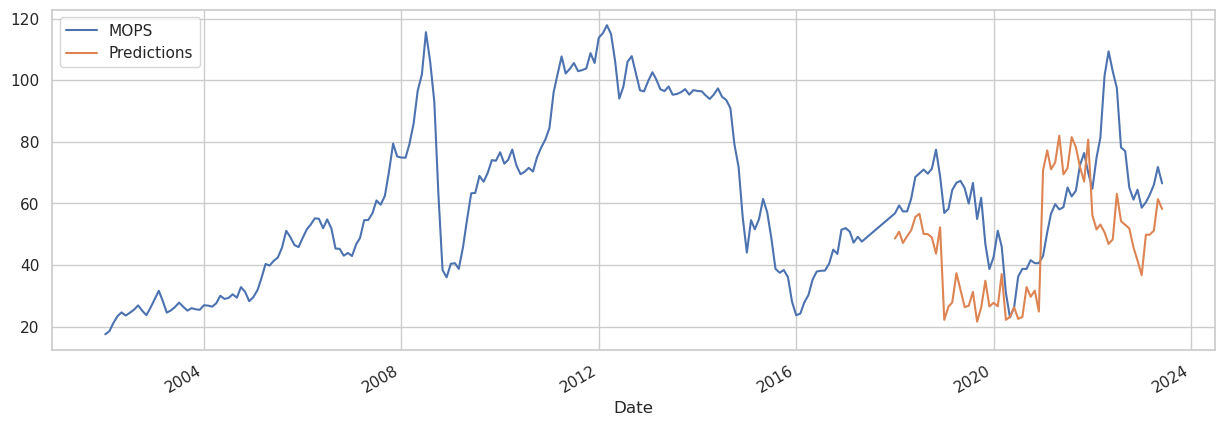

In [35]:
ax = df6['MOPS'].plot(figsize = (15,5))
df6['predictions'].plot(ax=ax,style ='-')

ax.legend(['MOPS','Predictions'])

In [36]:
rmse_test_set = np.sqrt(mean_squared_error(test['MOPS'],test['predictions']))

print(f'RMSE Score on Test set: {rmse_test_set:0.2f}')

RMSE Score on Test set: 23.44


In [37]:

# # Step 1: Generate Predictions
# xgboost_predictions = xgboost_model.predict(features)

# # Step 2: Calculate Volatility
# price_volatility = np.std(training_data['price'])  # You can use other volatility measures as well

# # Step 3: Define Price Range Factor (e.g., 1 standard deviation)
# price_range_factor = 1

# # Step 4: Generate Price Range Forecast
# price_central_estimate = xgboost_predictions
# price_upper_bound = price_central_estimate + price_volatility * price_range_factor
# price_lower_bound = price_central_estimate - price_volatility * price_range_factor

# print("Price Range Forecast:")
# print("Upper Bound:", price_upper_bound)
# print("Lower Bound:", price_lower_bound)


## I NEED TO RECREATE THE VOLATILITY MODEL FORECAST TO BE ADDED TO XGBOOST PREDICTION...


In [38]:
df6.tail()

,MOPS,quarter,month,year,MOPS_1,rolling_mean,rolling_std,EMA,MOPS_cat_ave,rolling_std_cat_ave,inflation_rate,Date,predictions
Date,,,,,,,,,,,,,
2023-02-01,60.3728,1,2,2023,58.6015,61.138200,2.993706,65.342129,58.639634,3.497896,NaN,NaT,49.806187
2023-03-01,62.7377,1,3,2023,60.3728,60.570667,2.075187,64.560800,59.803359,3.073671,NaN,NaT,49.826401
2023-04-01,66.0137,2,4,2023,62.7377,63.041400,2.832687,64.996670,62.038532,3.791022,NaN,NaT,51.150070
2023-05-01,71.8155,2,5,2023,66.0137,66.855633,4.597092,67.042319,63.103744,4.105425,NaN,NaT,61.378788
2023-06-01,66.5044,2,6,2023,71.8155,68.111200,3.217386,66.880943,63.778376,3.329308,NaN,NaT,58.158737


In [39]:
import pandas as pd
from datetime import datetime, timedelta

# Assuming you have a DataFrame named 'df' with a 'date' column
# Make sure the 'date' column is in datetime format
# df['date'] = pd.to_datetime(df['date'])

# Get the last date in the DataFrame
last_date = df6.index.max()

# Number of months to forecast ahead
forecast_months = 10

# Generate future dates
future_dates = [last_date + pd.DateOffset(months=i) for i in range(1, forecast_months + 1)]
     
a = pd.DataFrame(future_dates)

a.rename(columns = {0:'Date'}, inplace = True)

# a[['rolling_std',  'MOPS_cat_ave', 'rolling_std_cat_ave',
#        'inflation_rate']]

a['rolling_std'] = 0
a['MOPS_cat_ave'] = 0
a['rolling_std_cat_ave'] = 0
a['inflation_rate'] = 0

a.set_index('Date')

a

,Date,rolling_std,MOPS_cat_ave,rolling_std_cat_ave,inflation_rate
0,2023-07-01,0,0,0,0
1,2023-08-01,0,0,0,0
2,2023-09-01,0,0,0,0
3,2023-10-01,0,0,0,0
4,2023-11-01,0,0,0,0
5,2023-12-01,0,0,0,0
6,2024-01-01,0,0,0,0
7,2024-02-01,0,0,0,0
8,2024-03-01,0,0,0,0
9,2024-04-01,0,0,0,0


## FACEBOOK PROPHET


In [40]:
!pip install prophet

In [41]:
from prophet import Prophet

In [42]:
df6

,MOPS,quarter,month,year,MOPS_1,rolling_mean,rolling_std,EMA,MOPS_cat_ave,rolling_std_cat_ave,inflation_rate,Date,predictions
Date,,,,,,,,,,,,,
2002-01-01,17.482999,1,1,2002,NaN,NaN,NaN,17.482999,55.596752,3.691598,2.72,NaT,NaN
2002-02-01,18.539833,1,2,2002,17.482999,NaN,NaN,17.800049,58.639634,3.497896,2.72,NaT,NaN
2002-03-01,21.078740,1,3,2002,18.539833,19.033858,1.848076,18.783657,59.803359,3.073671,2.72,NaT,NaN
2002-04-01,23.339299,2,4,2002,21.078740,20.985957,2.401077,20.150349,62.038532,3.791022,2.72,NaT,NaN
2002-05-01,24.595988,2,5,2002,23.339299,23.004676,1.782340,21.484041,63.103744,4.105425,2.72,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,60.372800,1,2,2023,58.601500,61.138200,2.993706,65.342129,58.639634,3.497896,NaN,NaT,49.806187
2023-03-01,62.737700,1,3,2023,60.372800,60.570667,2.075187,64.560800,59.803359,3.073671,NaN,NaT,49.826401
2023-04-01,66.013700,2,4,2023,62.737700,63.041400,2.832687,64.996670,62.038532,3.791022,NaN,NaT,51.150070


In [43]:
df7 = df6[['MOPS']].reset_index()

df7=pd.DataFrame(df7)

df7.rename(columns = {'Date' : 'ds','MOPS' : 'y'}, inplace = True)

df7

,ds,y
0,2002-01-01,17.482999
1,2002-02-01,18.539833
2,2002-03-01,21.078740
3,2002-04-01,23.339299
4,2002-05-01,24.595988
...,...,...
246,2023-02-01,60.372800
247,2023-03-01,62.737700
248,2023-04-01,66.013700
249,2023-05-01,71.815500


In [44]:
model = Prophet()
model.fit(df7)

08:06:59 - cmdstanpy - INFO - Chain [1] start processing
08:06:59 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
months = 12*10

forecast_date = model.make_future_dataframe(periods = months, freq = 'M')

date =forecast_date.tail(months)
forecast_date.shape

(371, 1)

In [46]:
forecast = model.predict(date)

forecast[['ds','yhat_lower', 'yhat_upper', 'yhat']]


# forecast[['additive_terms', 'multiplicative_terms']]

,ds,yhat_lower,yhat_upper,yhat
0,2023-06-30,32.142820,80.581663,56.420424
1,2023-07-31,31.274061,77.807075,54.715860
2,2023-08-31,28.321323,78.340833,53.331696
3,2023-09-30,29.588617,79.581362,55.183815
4,2023-10-31,31.081404,80.215621,54.398793
...,...,...,...,...
115,2033-01-31,1.896670,54.217454,28.312468
116,2033-02-28,4.610349,55.917490,29.595958
117,2033-03-31,5.601108,60.153451,32.462392
118,2033-04-30,6.413729,60.344766,33.832028


## SIMPLE FORECAST

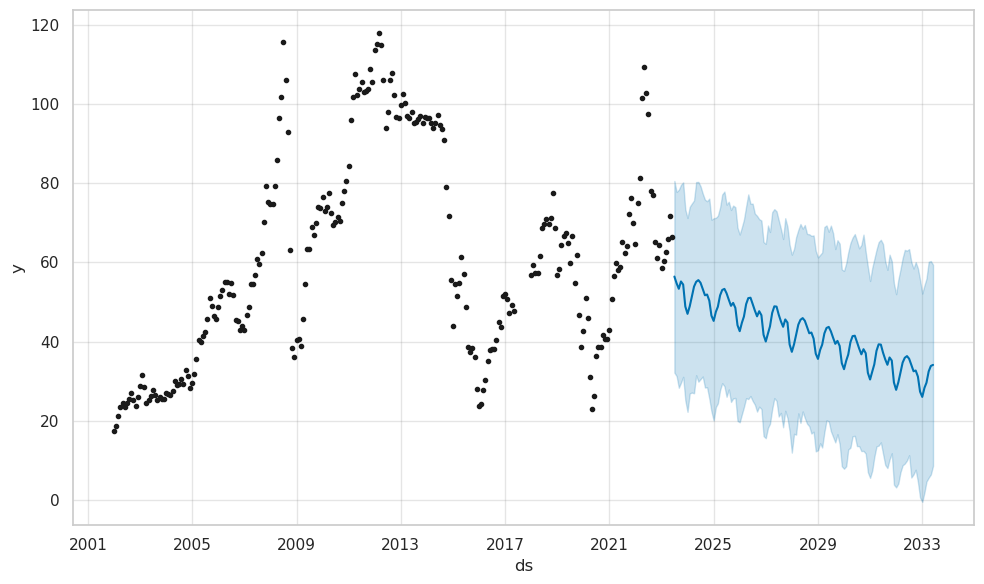

In [47]:
fig1 = model.plot(forecast)

In [48]:
# Python
m = Prophet(mcmc_samples=1000)
forecast = m.fit(df7, show_progress=False).predict(date)


08:07:02 - cmdstanpy - INFO - CmdStan installation /opt/conda/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:07:02 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
08:07:02 - cmdstanpy - INFO - CmdStan start processing
08:07:02 - cmdstanpy - INFO - Chain [1] start processing
08:07:02 - cmdstanpy - INFO - Chain [2] start processing
08:07:02 - cmdstanpy - INFO - Chain [3] start processing
08:07:02 - cmdstanpy - INFO - Chain [4] start processing
08:07:22 - cmdstanpy - INFO - Chain [1] done processing
08:07:23 - cmdstanpy - INFO - Chain [2] done processing
08:07:24 - cmdstanpy - INFO - Chain [3] done processing
08:07:24 - cmdstanpy - INFO - Chain [4] done processing
08:07:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_g

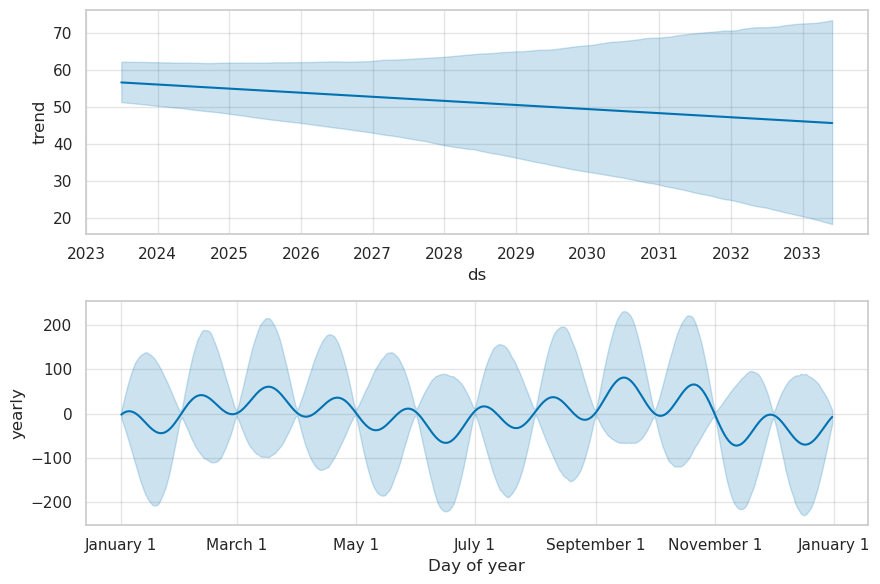

In [49]:
fig = m.plot_components(forecast)


In [50]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-06-30,56.626219,20.729371,87.009920,51.333053,62.208926,-2.236284,-26.311965,21.609381,-2.236284,-26.311965,21.609381,0.0,0.0,0.0,54.389935
1,2023-07-31,56.532683,17.460591,87.060043,51.175212,62.190039,-4.579473,-27.979876,18.879433,-4.579473,-27.979876,18.879433,0.0,0.0,0.0,51.953211
2,2023-08-31,56.439148,16.712759,85.164017,51.013698,62.177398,-5.072133,-27.721780,17.271017,-5.072133,-27.721780,17.271017,0.0,0.0,0.0,51.367015
3,2023-09-30,56.348630,29.118126,95.596987,50.844101,62.162039,6.832735,-16.922327,30.723396,6.832735,-16.922327,30.723396,0.0,0.0,0.0,63.181364
4,2023-10-31,56.255094,33.995071,102.635751,50.694927,62.139302,12.286516,-11.418433,35.428191,12.286516,-11.418433,35.428191,0.0,0.0,0.0,68.541610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2033-01-31,46.056700,3.962330,77.802232,20.225589,72.590385,-5.219543,-15.673347,4.850720,-5.219543,-15.673347,4.850720,0.0,0.0,0.0,40.837158
116,2033-02-28,45.972217,8.247430,83.586843,19.819705,72.651392,-1.085009,-16.802890,14.423167,-1.085009,-16.802890,14.423167,0.0,0.0,0.0,44.887208
117,2033-03-31,45.878681,15.426138,89.866375,19.384936,72.838047,5.596750,-8.457136,20.254512,5.596750,-8.457136,20.254512,0.0,0.0,0.0,51.475431
118,2033-04-30,45.788163,14.684003,95.587790,18.936863,73.084757,8.122796,-7.181875,23.628214,8.122796,-7.181875,23.628214,0.0,0.0,0.0,53.910958


### FORECASTING SETTINGS:

Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.80, uncertainty_samples=1000, stan_backend=None)

08:07:32 - cmdstanpy - INFO - CmdStan installation /opt/conda/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:07:32 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
08:07:32 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

08:07:55 - cmdstanpy - INFO - CmdStan done processing.
08:07:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above 

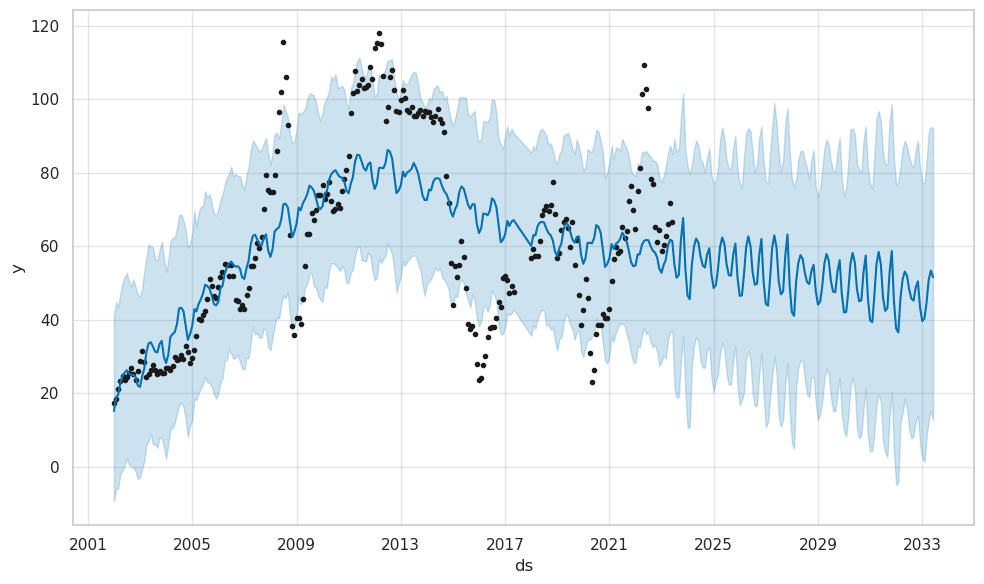

In [51]:
m = Prophet(mcmc_samples=1000)
forecast = m.fit(df7).predict(forecast_date)
fig = m.plot(forecast)

08:08:02 - cmdstanpy - INFO - CmdStan installation /opt/conda/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:08:02 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
08:08:02 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

08:09:29 - cmdstanpy - INFO - CmdStan done processing.
08:09:29 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
08:09:29 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 402 iterations at max treedepth (80.4%)
	Chain 2 had 472 iterations a

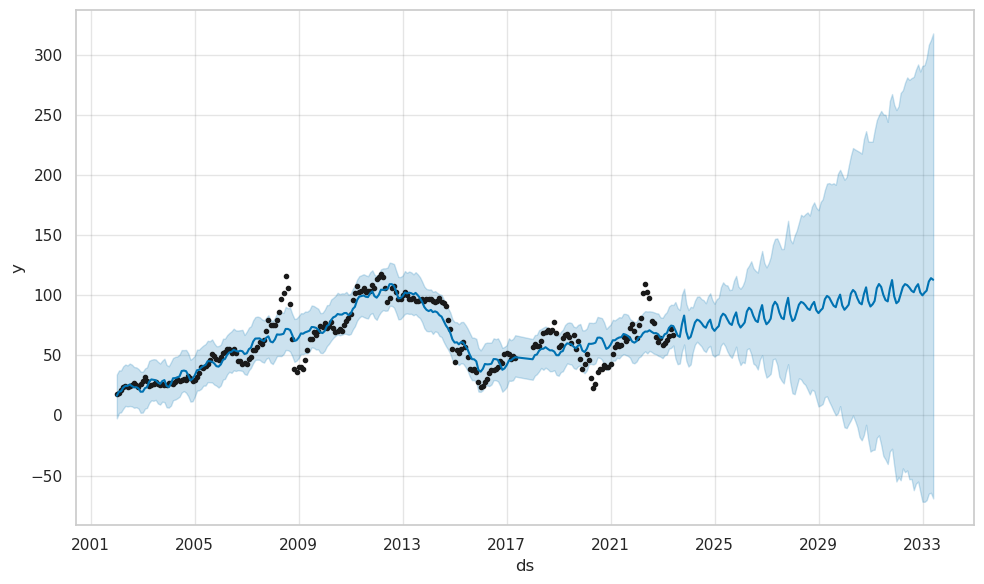

In [52]:
m = Prophet(changepoint_prior_scale=0.5,mcmc_samples=1000)
forecast = m.fit(df7).predict(forecast_date)
fig = m.plot(forecast)

In [53]:
holidays_ph = pd.DataFrame({
    'holiday': 'Philippines_Holidays',
    'ds': pd.to_datetime(['2023-01-01', '2023-04-09', '2023-04-21', '2023-05-01', '2023-06-12',
                          '2023-08-21', '2023-11-01', '2023-12-25', '2023-12-30']),
    'lower_window': 0,
    'upper_window': 0,
})

08:09:36 - cmdstanpy - INFO - CmdStan installation /opt/conda/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:09:36 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
08:09:36 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

08:11:03 - cmdstanpy - INFO - CmdStan done processing.
08:11:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
08:11:03 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 383 iterations at max treedepth (76.6%)
	Chain 2 had 457 

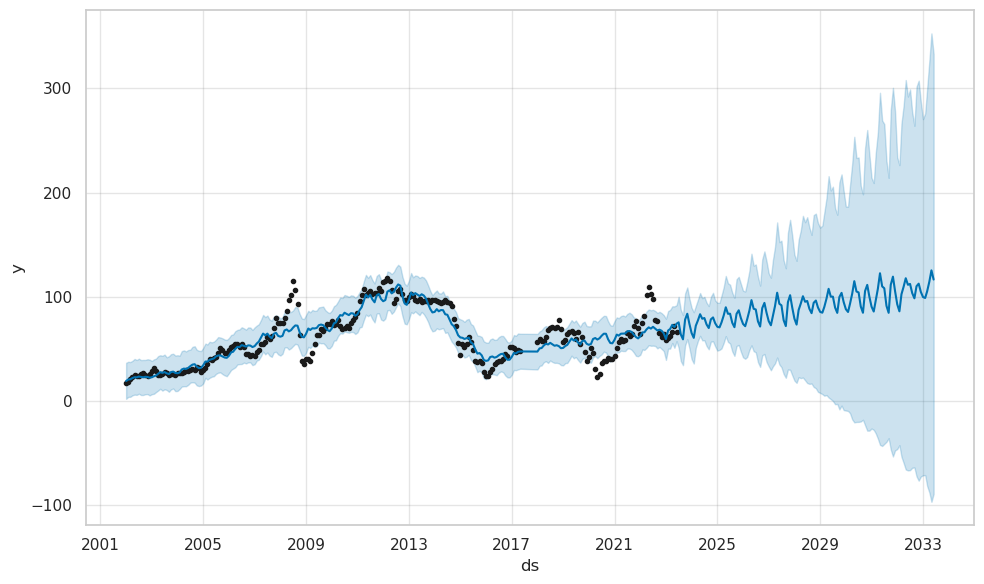

In [54]:
m = Prophet(changepoint_prior_scale=0.5,mcmc_samples=1000,holidays=holidays_ph,seasonality_mode='multiplicative')
forecast = m.fit(df7).predict(forecast_date)
fig = m.plot(forecast)

In [55]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Philippines_Holidays,Philippines_Holidays_lower,Philippines_Holidays_upper,holidays,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2002-01-01,20.013488,2.118566,36.669830,14.549883,25.449929,0.0,0.0,0.0,0.0,...,-0.037704,-0.102558,0.026520,-0.037704,-0.102558,0.026520,0.0,0.0,0.0,19.258894
1,2002-02-01,20.335521,3.956492,37.682781,15.225437,25.452735,0.0,0.0,0.0,0.0,...,0.015071,-0.054559,0.085919,0.015071,-0.054559,0.085919,0.0,0.0,0.0,20.642004
2,2002-03-01,20.626389,4.026825,37.392601,15.842380,25.485418,0.0,0.0,0.0,0.0,...,0.012049,-0.054622,0.079366,0.012049,-0.054622,0.079366,0.0,0.0,0.0,20.874910
3,2002-04-01,20.948421,5.497129,38.576483,16.364269,25.523519,0.0,0.0,0.0,0.0,...,0.050942,-0.014018,0.115625,0.050942,-0.014018,0.115625,0.0,0.0,0.0,22.015566
4,2002-05-01,21.260066,6.123894,40.380164,17.012636,25.586690,0.0,0.0,0.0,0.0,...,0.074185,0.008985,0.139122,0.074185,0.008985,0.139122,0.0,0.0,0.0,22.837242


08:11:09 - cmdstanpy - INFO - CmdStan installation /opt/conda/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:11:09 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
08:11:09 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

08:12:15 - cmdstanpy - INFO - CmdStan done processing.
08:12:15 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector

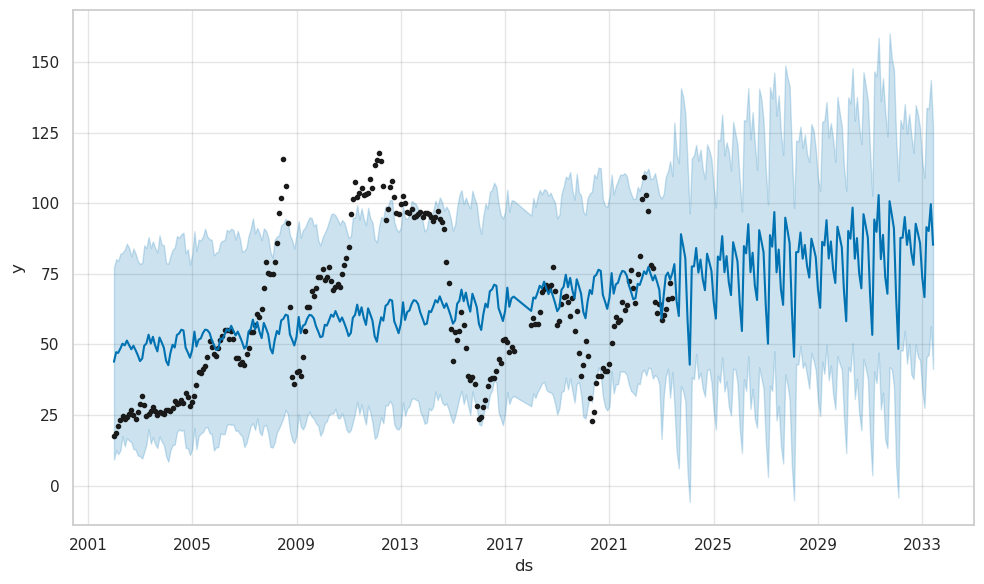

In [56]:
m = Prophet(changepoint_prior_scale=0.001,mcmc_samples=1000,holidays=holidays_ph,seasonality_mode='multiplicative')
forecast = m.fit(df7).predict(forecast_date)
fig = m.plot(forecast)

08:12:23 - cmdstanpy - INFO - CmdStan installation /opt/conda/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:12:23 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
08:12:23 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

08:13:06 - cmdstanpy - INFO - CmdStan done processing.
08:13:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is inf, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


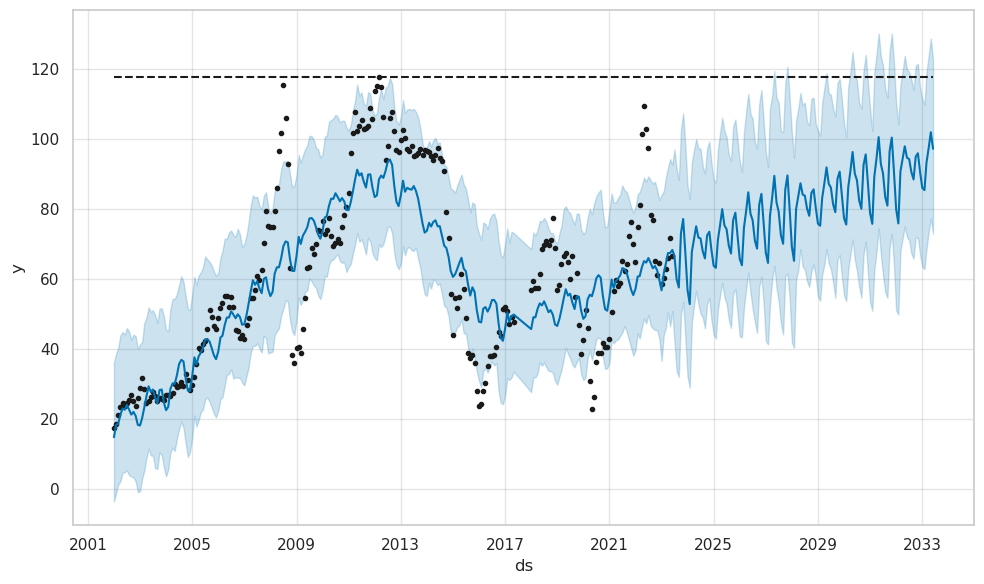

In [57]:
df7['cap'] = df7['y'].max()
forecast_date['cap'] = df7['y'].max()

m = Prophet(
    changepoint_prior_scale=.5,
    mcmc_samples=1000,
    holidays=holidays_ph,
    seasonality_mode='additive',
    growth='logistic'
)

# m = Prophet(changepoint_prior_scale=0.8,mcmc_samples=1000,holidays=holidays_ph,seasonality_mode='multiplicative',growth='logistic')
forecast = m.fit(df7).predict(forecast_date)
fig = m.plot(forecast)

08:13:33 - cmdstanpy - INFO - CmdStan installation /opt/conda/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
08:13:33 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
08:13:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

08:15:21 - cmdstanpy - INFO - CmdStan done processing.
08:15:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/project/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
08:15:21 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 499 iterations at max treedepth (99.8%)
	Chain 2 had 37 iterations at

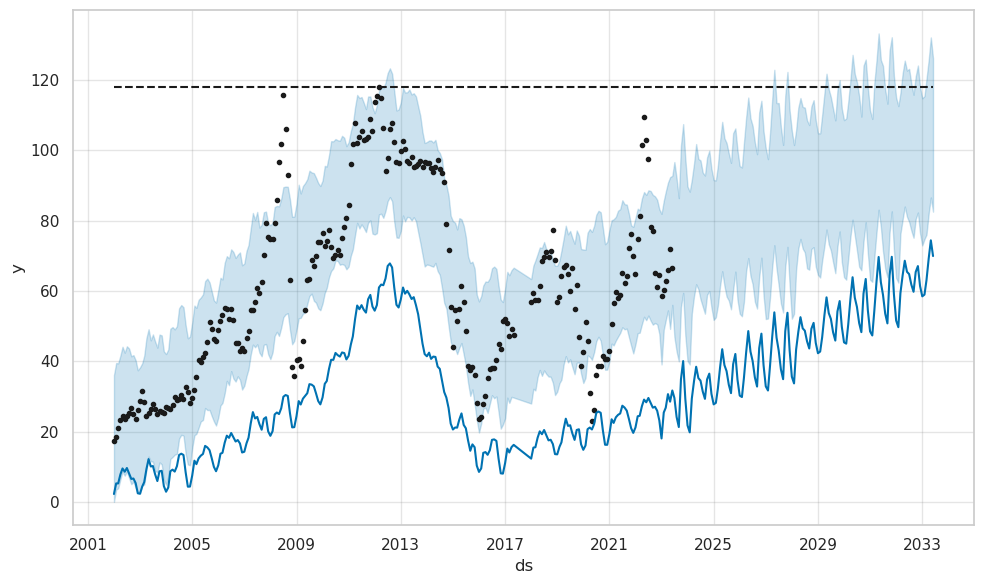

In [58]:
m = Prophet(
    changepoint_prior_scale=1.5,
    mcmc_samples=1000,
    holidays=holidays_ph,
    seasonality_mode='additive',
    growth='logistic'
)

# m = Prophet(changepoint_prior_scale=0.8,mcmc_samples=1000,holidays=holidays_ph,seasonality_mode='multiplicative',growth='logistic')
forecast = m.fit(df7).predict(forecast_date)
fig = m.plot(forecast)